# How to Not Misunderstand Correlation by Using Regression
## TODO
<img src='images/thirdman.jpg'></img>
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://www.pexels.com/@thirdman?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Thirdman</a>
        on 
        <a href='https://www.pexels.com/photo/city-businessman-hands-creative-5582597/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels'>Pexels</a>
    </strong>
</figcaption>

### Introduction

### Setup

In [144]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

### Scatterplots Masterclass

One of the most common and easily understood plots is a scatterplot. They may be easy but you might be surprised how difficult it is to build one which perfectly captures the relationship between variables. As an example, I will load the historical [Olympics dataset](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results) that contains data of athletes from 1896 to 2016:

In [145]:
olymp = pd.read_csv('data/athlete_events.csv', usecols=['Sex', 'Age', 'Height', 'Weight', 'Year', 'Sport', 'NOC']).dropna()

In [146]:
olymp.head()

,Sex,Age,Height,Weight,NOC,Year,Sport
0,M,24.0,180.0,80.0,CHN,1992,Basketball
1,M,23.0,170.0,60.0,CHN,2012,Judo
4,F,21.0,185.0,82.0,NED,1988,Speed Skating
5,F,21.0,185.0,82.0,NED,1988,Speed Skating
6,F,25.0,185.0,82.0,NED,1992,Speed Skating


In [147]:
olymp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 271115
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Sex     206165 non-null  object 
 1   Age     206165 non-null  float64
 2   Height  206165 non-null  float64
 3   Weight  206165 non-null  float64
 4   NOC     206165 non-null  object 
 5   Year    206165 non-null  int64  
 6   Sport   206165 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 12.6+ MB


In [148]:
olymp.shape

(206165, 7)

Scatterplots work very well to show the relationship between two variables, especially numeric. Traditionally, we would use `pyplot`'s `scatter` or `seaborn`'s `scatterplot` function to generate scatterplots. However, `pyplot` provides a much faster way of plotting them for large datasets such as ours.

We will plot the height versus weight using `pyplot.plot` by setting the marker string to `o` which plots the data points as dots:

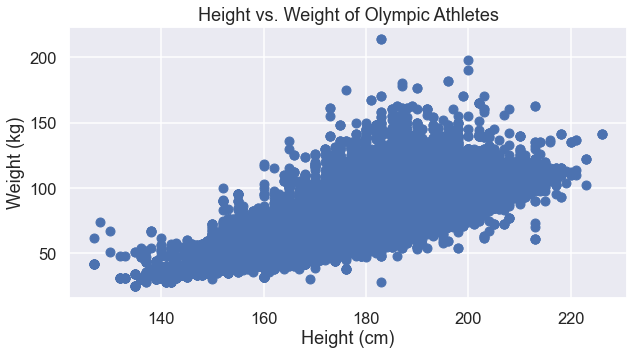

In [149]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10,5))

# Create the scatterplot
ax.plot(olymp['Height'], 
        olymp['Weight'], 
        marker='o', # plot as dots
        linestyle='') # remove line

# Labeling
ax.set(title='Height vs. Weight of Olympic Athletes',
      xlabel='Height (cm)', ylabel='Weight (kg)')

plt.show();

From the plot, we can see that taller athletes tend to weigh more. However, as there are more than 200k data points, the plot is overplotted. As more and more data points pile on top of each other, it is hard to say if there are many or few points around some area. To improve this, we will use transparency using `alpha` parameter of `plt.plot`:

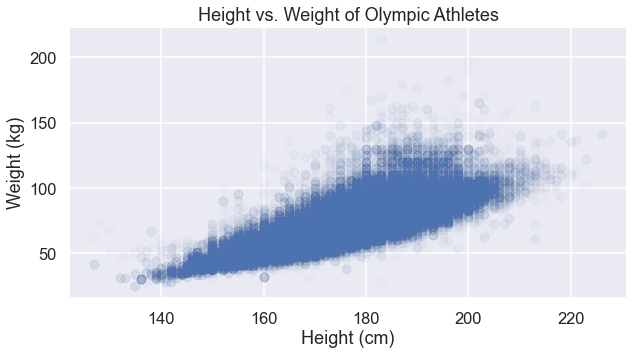

In [150]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10,5))

# Create the scatterplot
ax.plot(olymp['Height'], 
        olymp['Weight'], 
        marker='o', 
        linestyle='', 
        alpha=0.02) # Lower transparency

# Labeling
ax.set(title='Height vs. Weight of Olympic Athletes',
      xlabel='Height (cm)', ylabel='Weight (kg)')

plt.show();

Even though we increased transparency, the plot still looks overplotted. To further improve, we will decrease the marker size using `markersize` parameter:

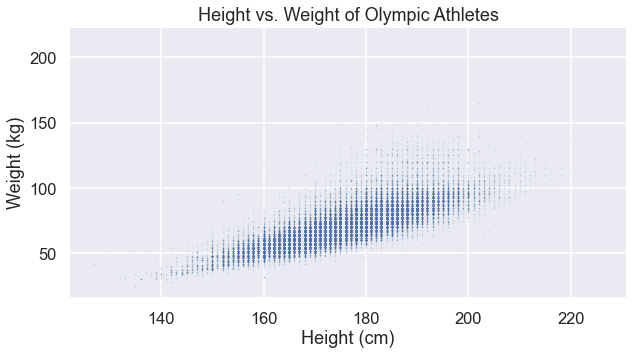

In [151]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10,5))

# Create a scatterplot
ax.plot(olymp['Height'], 
        olymp['Weight'], 
        marker='o', 
        linestyle='', 
        alpha=0.02,
        markersize=1) # Used to control the markers

# Labeling
ax.set(title='Height vs. Weight of Olympic Athletes',
      xlabel='Height (cm)', ylabel='Weight (kg)')

plt.show();

The plot looks much nicer but now, we can see that the heights are grouped around as columns. The reason might be that they were reported as inches and then converted to rounded, integer centimeters. 

To get around this problem, there is a technique called jittering. It is a method to generate fake data as random noise to improve plots like above. 

If we were using `seaborn`, we would use `x_jitter` or `y_jitter` parameters, but `matplotlib` does not have them. To solve this, we will use `np.random.normal` function which generates a normal distribution with a given mean and standard deviation. 

So as to not affect the real data, we will create a normal distribution with mean 0 and a standard deviation of 2 (arbitrary choice, but needs to be small). Then, we will add this distribution to the athlete heights:

In [152]:
height_jitter = olymp['Height'] + np.random.normal(0, 2, size=len(olymp))

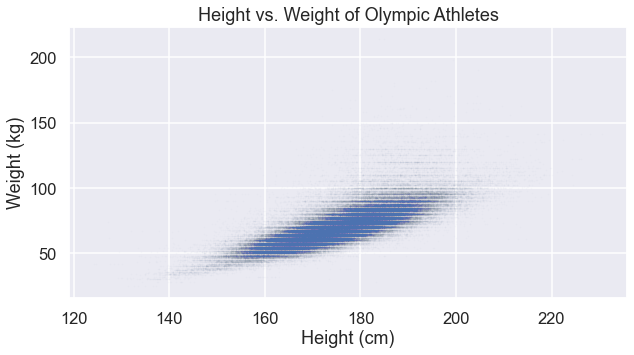

In [153]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10,5))

# Create a scatterplot
ax.plot(height_jitter, # Jittered heights
        olymp['Weight'], 
        marker='o', 
        linestyle='', 
        alpha=0.01,
        markersize=1)

# Labeling
ax.set(title='Height vs. Weight of Olympic Athletes',
      xlabel='Height (cm)', ylabel='Weight (kg)')

plt.show();

Now that we got rid of columns, we can see that weights have the same pattern. We will perform the above operation but with a lower standard deviation:

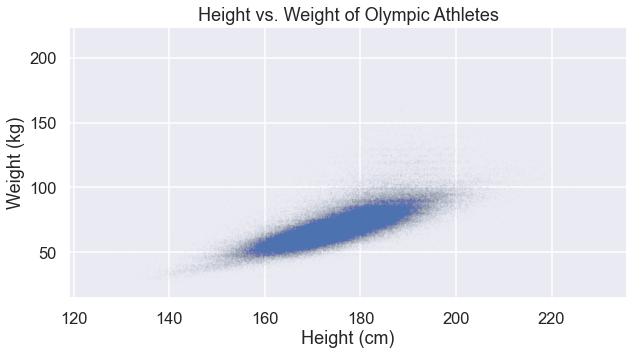

In [154]:
weight_jitter = olymp['Weight'] + np.random.normal(0, 1, size=len(olymp))

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10,5))

# Create a scatterplot
ax.plot(height_jitter, # Jittered heights
        weight_jitter, # Jittered weights
        marker='o', 
        linestyle='', 
        alpha=0.01,
        markersize=1)

# Labeling
ax.set(title='Height vs. Weight of Olympic Athletes',
      xlabel='Height (cm)', ylabel='Weight (kg)')

plt.show();

Finally, we have a plot that is close to perfection. The final step would be to zoom in on the main cluster of points:

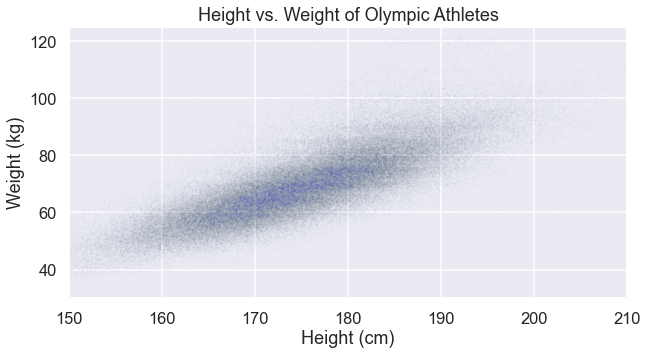

In [155]:
weight_jitter = olymp['Weight'] + np.random.normal(0, 1, size=len(olymp))

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10,5))

# Create a scatterplot
ax.plot(height_jitter,
        weight_jitter,
        marker='o', 
        linestyle='', 
        alpha=0.01,
        markersize=1)

# Zoom in
ax.axis([150, 210, 30, 125])

# Labeling
ax.set(title='Height vs. Weight of Olympic Athletes',
      xlabel='Height (cm)', ylabel='Weight (kg)')

plt.show();

To see the effect of our latest operations, you can compare the final version with the initial plot:

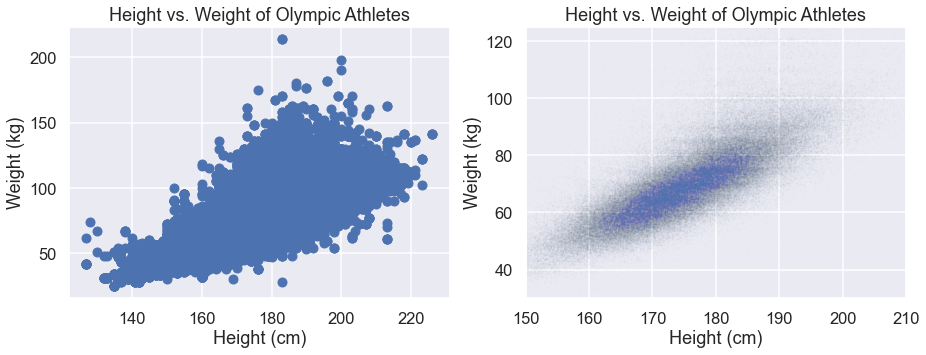

In [156]:
# Create figure and axis objects
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Initial plot
ax.plot(olymp['Height'], 
        olymp['Weight'], 
        marker='o',
        linestyle='')
ax.set(title='Height vs. Weight of Olympic Athletes',
      xlabel='Height (cm)', ylabel='Weight (kg)')

# The final plot
ax2.plot(height_jitter,
        weight_jitter,
        marker='o', 
        linestyle='', 
        alpha=0.01,
        markersize=1)
ax2.axis([150, 210, 30, 125])
ax2.set(title='Height vs. Weight of Olympic Athletes',
      xlabel='Height (cm)', ylabel='Weight (kg)')

plt.show();

It is very important to get the scatterplots right. Before you move on to regression and further steps, you have to do your best to understand the relationship between the variables of interest. Especially, finding out whether the relationship is linear or not by looking at scatterplots is crucial to understand the correlation coefficient which we will discuss next.

### Pearson's Correlation Coefficient

In the previous section, we learned how to visualize the relationship between two variables. In this section, we will learn a metric that quantifies the strength of these relationships. In statistics, this metric is called Pearson's correlation coefficient. It takes values between -1 and 1.

The higher the absolute value of the coefficient, the strong the relationship. The sign of the coefficient indicates the direction of the relationship:

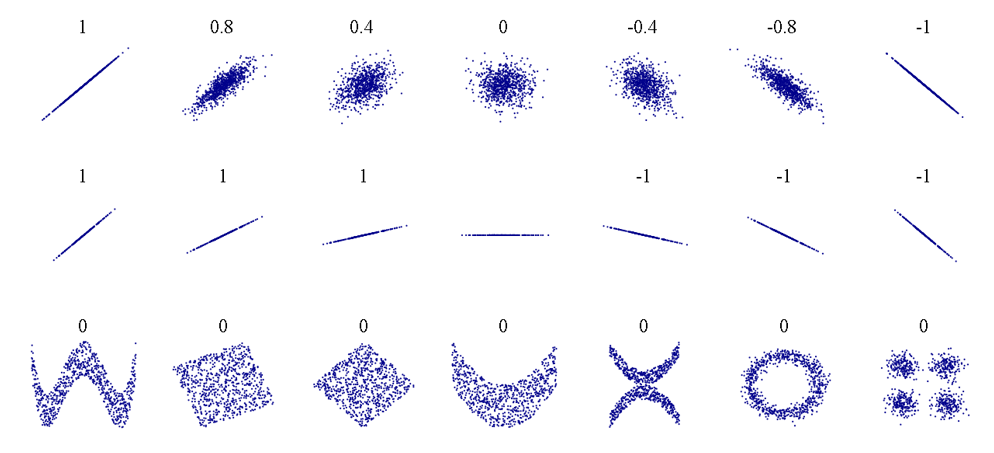

Positive coefficient means that as x variable increases, the y variable increases whereas negative coefficient represents a pattern where y decreases when x increases. 

Visually, Pearson's correlation coefficient tells us how close the data points are to each other. In the first row of the above plot, you can see correlation of varying strengths. 

However, it is important that you do not confuse correlation with slope. Consider the tricky examples of this in the second line, where the correlation is the same but the slope is different.

Besides, Pearson's coefficient only captures **linear** relationships. If the trend does resemble a line it does not matter how close the data points are. You can see such examples on the final row of the image.

Generally, there are three categories of correlation:

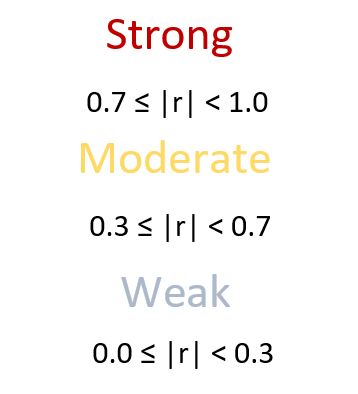

Correlation coefficient is usually denoted as a lower-case `r`. For the curious, here is the formula that is used under the hood by software packages to compute Pearson's correlation:

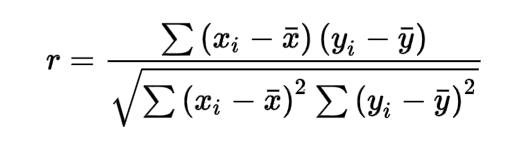

If you did your homework on statistics, you will know that the formula is covariance of x and y over the product of their standard deviations. (By the way, you can deduce the reason why the central plot which is a horizontal scatterplot has no correlation. Having completely horizontal or vertical trend means that one of the variables are constant so the standard deviation is 0, i. e. you cannot divide by zero).

Moving on to code, the correlation coefficient can be computed using the `corr` method on a dataframe. We will only see the coefficients for age, weight and height columns of Olympics dataset:

In [157]:
olymp[['Weight', 'Height', 'Age']].corr()

,Weight,Height,Age
Weight,1.000000,0.796573,0.212041
Height,0.796573,1.000000,0.141684
Age,0.212041,0.141684,1.000000


The result is a correlation matrix which shows the correlation coefficients of individual pairs of three variables. By interpreting the results, we can see that height and weight is highly correlated with a coefficient of 0.8. However, the relationships between age and weight as well as age and height are weak (0.21, 0.14) respectively. 

However, you should never, ever conclude about the relationship between variables by just looking at the correlation coefficient. Make sure that your assumptions are correct by looking at them visually with the help of scatterplots or in some cases, using boxplots or violin plots. 

For example, we can double-check the correlation between age and weight using a scatterplot. The raw plot won't give us much insight so I will make a few changes using the techniques of the previous section:

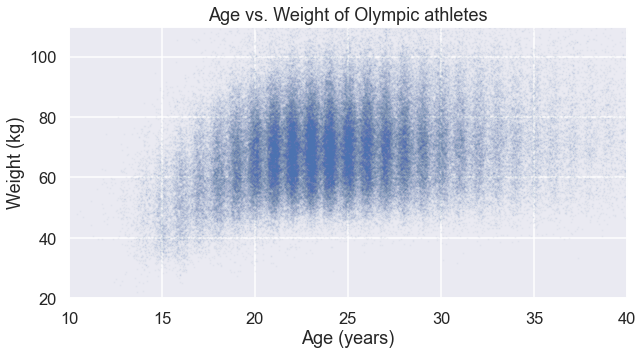

In [158]:
# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 5))

# Jitter the ages
age_jitter = olymp['Age'] + np.random.normal(0, 0.3, size=len(olymp))
# Jitter the weights
weight_jitter = olymp['Weight'] + np.random.normal(0, 2, size=len(olymp))
# Create the scatterplot
ax.plot(age_jitter, weight_jitter, 'o', alpha=0.03, markersize=1.2)

# Zoom in
ax.axis([10, 40, 20, 110])

# Label
ax.set(title='Age vs. Weight of Olympic athletes',
       xlabel='Age (years)', ylabel='Weight (kg)')

plt.show();

The data points are more spread out which does suggest a lower correlation (0.21). 

### Line of Best Fit

### Linear Regression

### Multiple Regression